In [1]:
# Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Data Import

df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [4]:
#Splitting Brand name from CarName column
BrandName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"BrandName",BrandName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

df.BrandName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [5]:
df.BrandName = df.BrandName.str.lower()

In [6]:
def replace_name(a,b):
    df.BrandName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.BrandName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [7]:
# Data Analysis/ Count / Mean / Standard Deviation / Min-...-Max

df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Data / Column / Non-Null Count / Dtype  

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   BrandName         205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.columns

Index(['car_ID', 'symboling', 'BrandName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<AxesSubplot:>

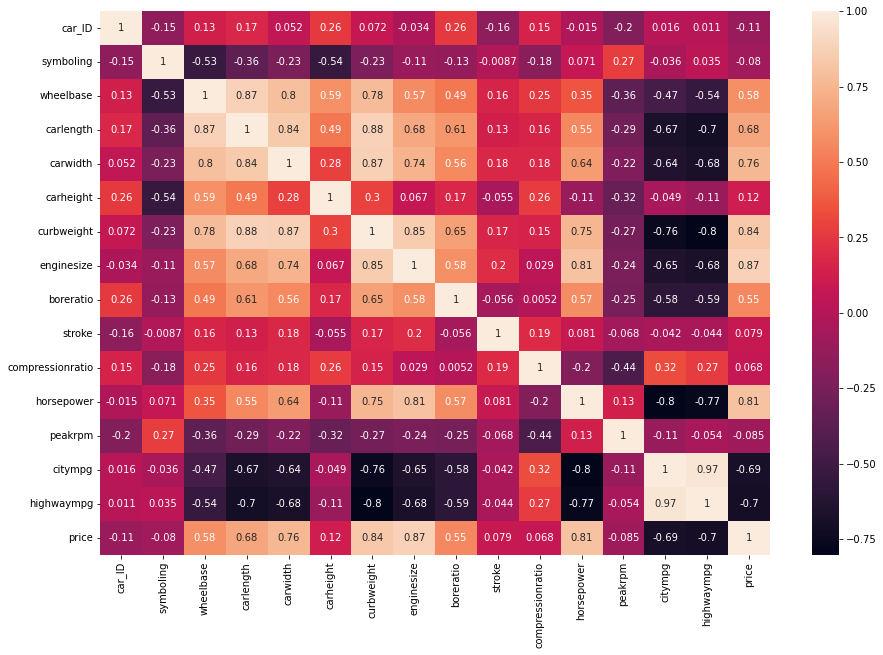

In [10]:
cor = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(cor,annot = True)

In [11]:
del df['car_ID']
del df['symboling']
del df['carheight']
del df['stroke']
del df['compressionratio']
del df['peakrpm']

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


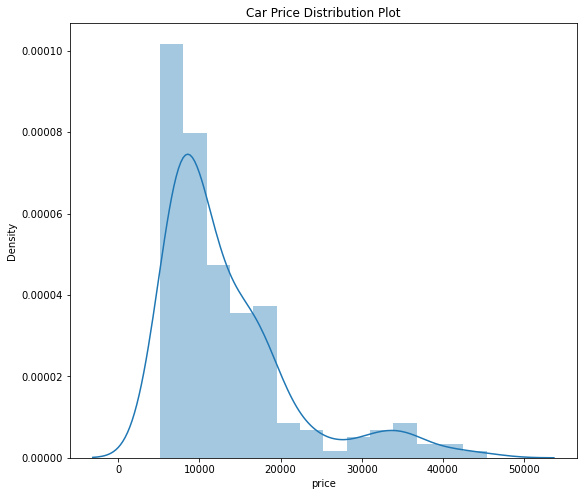

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)


plt.show()

In [13]:
print(df.price.describe(percentiles = [0.1,0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
10%       6657.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


<Figure size 1800x432 with 0 Axes>

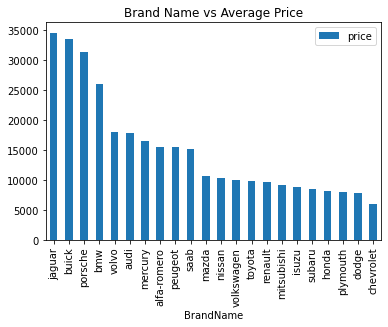

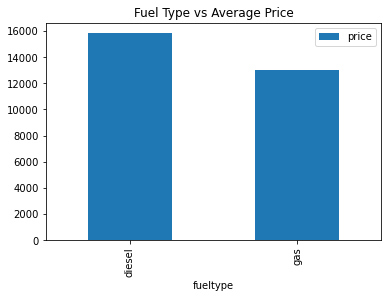

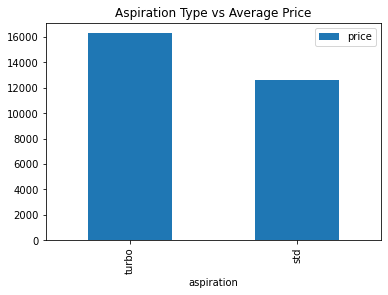

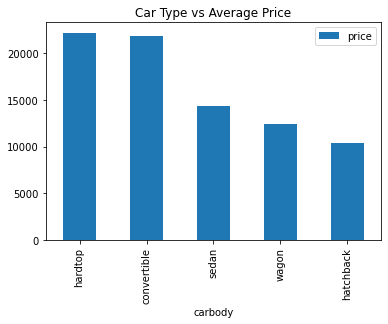

In [14]:
plt.figure(figsize=(25, 6))

df1 = pd.DataFrame(df.groupby(['BrandName'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Brand Name vs Average Price')
plt.show()

df1 = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df1 = pd.DataFrame(df.groupby(['aspiration'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Aspiration Type vs Average Price')
plt.show()

df1 = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

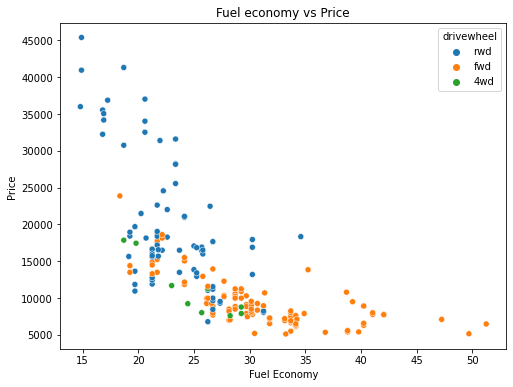

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=(0.55 * df['citympg']) + (0.45 * df['highwaympg']),y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

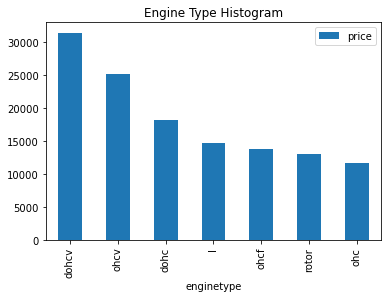

In [16]:
df1 = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Engine Type Histogram')
plt.show()

In [17]:
df.drivewheel.unique()
df.enginelocation.unique()
df.enginetype.unique()
df.cylindernumber.unique()
df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [18]:
df['fueltype'] = df['fueltype'].replace({'diesel': 1, 'gas': 0})

df['BrandName'] = df['BrandName'].replace({'alfa-romero':0, 'audi':1, 'bmw':2, 'chevrolet':3, 'dodge':4, 'honda':5,
       'isuzu':6, 'jaguar':7, 'mazda':8, 'buick':9, 'mercury':10, 'mitsubishi':11,
       'nissan':12, 'peugeot':13, 'plymouth':14, 'porsche':15, 'renault':16, 'saab':17,
       'subaru':18, 'toyota':19, 'volkswagen':20, 'volvo':21})

df['doornumber'] = df['doornumber'].replace({'two':2,'four':4})

df['aspiration'] = df['aspiration'].replace({'std':1,'turbo':0})

df['carbody'] = df['carbody'].replace({'hardtop':0,'convertible':1,'sedan':2,'wagon':3,'hatchback':4})

df['drivewheel'] = df['drivewheel'].replace({'fwd':0,'rwd':1,'4wd':4})

df['enginelocation'] = df['enginelocation'].replace({'front':0,'rear':1})

df['enginetype'] = df['enginetype'].replace({'ohc':0, 'ohcv':1, 'dohc':2, 'ohcf':3, 'l':4, 'rotor':5, 'dohcv':6})

df['cylindernumber'] = df['cylindernumber'].replace({'four':4, 'eight':8, 'six':6, 'five':5, 'two':2, 'three':3, 'twelve':12})

df['fuelsystem'] = df['fuelsystem'].replace({'mpfi':0, '1bbl':1, 'idi':2, '2bbl':3, '4bbl':4, 'spdi':5, 'mfi':6, 'spfi':7})

In [19]:
# CORRELATION
import warnings
warnings.filterwarnings("ignore")
def transform( values: pd.Series, functionName: str ) -> pd.Series:
    if functionName == 'log':
        return np.log( values )
    elif functionName == 'log2':
        return np.log2( values )
    elif functionName == 'sqrt':
        return np.sqrt( values )
    elif functionName == 'pow2.0':
        return np.power( values, 2.0 )
    elif functionName == 'pow3.0':
        return np.power( values, 3.0 )
    elif functionName == 'pow1.5':
        return np.power( values, 1.5 )
    elif functionName == 'pow1.2':
        return np.power( values, 1.2 )
    elif functionName == 'pow0.7':
        return np.power( values, 0.7 )
    elif functionName == 'exp':
        return np.exp( values )
    elif functionName == 'round':
        return np.round( values )
    elif functionName == 'round-1':
        return np.round( values, -1 )
    elif functionName == 'gtMean':
        mean = values.mean()
        return (values > mean).astype(int)
    elif functionName == 'gtMedian':
        median = values.median()
        return (values > median).astype(int)
    elif functionName == 'eqMode':
        mode = values.mode()[0]
        return (values == mode).astype(int)
       

    return values

results = pd.DataFrame( columns = ['COLUMN', 'SELF', 'LOG', 'LOG2', 'SQRT', 'POW0.7', 'POW1.2', 'POW1.5', 'POW2.0', 'POW3.0', 'EXP', 'ROUND', 'ROUND-1', 'gtMean', 'gtMedian', 'eqMode'] )

for c in df:
    if str(df.dtypes[c]) in ['float64', 'int64']:
        results.loc[ len(results) ] = [
            c,
            df[c].corr(df['price']),
            transform(df[c], 'log').corr(df['price']),
            transform(df[c], 'log2').corr(df['price']),
            transform(df[c], 'sqrt').corr(df['price']),
            transform(df[c], 'pow0.7').corr(df['price']),
            transform(df[c], 'pow1.2').corr(df['price']),
            transform(df[c], 'pow1.5').corr(df['price']),
            transform(df[c], 'pow2.0').corr(df['price']),
            transform(df[c], 'pow3.0').corr(df['price']),
            transform(df[c], 'exp').corr(df['price']),
            transform(df[c], 'round').corr(df['price']),
            transform(df[c], 'round-1').corr(df['price']),
            transform(df[c], 'gtMean').corr(df['price']),
            transform(df[c], 'gtMedian').corr(df['price']),
            transform(df[c], 'eqMode').corr(df['price'])
        ]

results=results.fillna(0)

results["max"] = results.max(axis=1)
results["min"] = results.min(axis=1)

results["difference"] = results["max"] - results["SELF"]

results["conclusion"] = results.apply(lambda x: "true" if x["max"] > x["SELF"]else "false" , axis=1)



results.to_csv("Sonuc.csv")

results

,COLUMN,SELF,LOG,LOG2,SQRT,POW0.7,POW1.2,POW1.5,POW2.0,POW3.0,EXP,ROUND,ROUND-1,gtMean,gtMedian,eqMode,max,min,difference,conclusion
0,BrandName,-0.153948,0.000000,0.000000,-0.162960,-0.159759,-0.150511,-0.146202,-0.140582,-0.130958,0.055976,-0.153948,-0.049568,-0.084546,-0.084546,-0.182997,0.055976,-0.182997,2.099244e-01,true
1,fueltype,0.105679,0.000000,0.000000,0.105679,0.105679,0.105679,0.105679,0.105679,0.105679,0.105679,0.105679,0.000000,0.105679,0.105679,-0.105679,0.105679,-0.105679,4.163336e-17,true
2,aspiration,-0.177926,0.000000,0.000000,-0.177926,-0.177926,-0.177926,-0.177926,-0.177926,-0.177926,-0.177926,-0.177926,0.000000,-0.177926,0.000000,-0.177926,0.000000,-0.177926,1.779262e-01,true
3,doornumber,0.031835,0.031835,0.031835,0.031835,0.031835,0.031835,0.031835,0.031835,0.031835,0.031835,0.031835,0.000000,0.031835,0.000000,0.031835,0.031835,0.000000,4.857226e-17,true
4,carbody,-0.350199,0.000000,0.000000,-0.355509,-0.358279,-0.342876,-0.332278,-0.317705,-0.298612,-0.293984,-0.350199,0.000000,-0.276951,-0.276951,0.125716,0.125716,-0.358279,4.759159e-01,true
5,drivewheel,0.295827,0.000000,0.000000,0.490739,0.417410,0.220802,0.130085,0.035762,-0.035521,-0.010678,0.295827,0.000000,0.601950,0.601950,-0.601950,0.601950,-0.601950,3.061235e-01,true
6,enginelocation,0.324973,0.000000,0.000000,0.324973,0.324973,0.324973,0.324973,0.324973,0.324973,0.324973,0.324973,0.000000,0.324973,0.324973,-0.324973,0.324973,-0.324973,0.000000e+00,false
7,wheelbase,0.577816,0.568570,0.568570,0.573358,0.575181,0.579505,0.581940,0.585727,0.592281,0.245201,0.588395,0.518277,0.522444,0.449881,-0.179340,0.592281,-0.179340,1.446554e-02,true
8,carlength,0.682920,0.671915,0.671915,0.677615,0.679785,0.684931,0.687828,0.692339,0.700180,0.244746,0.682147,0.664836,0.528660,0.497546,-0.227666,0.700180,-0.227666,1.725980e-02,true
9,carwidth,0.759325,0.755915,0.755915,0.757667,0.758341,0.759963,0.760891,0.762363,0.765028,0.570433,0.776334,0.405883,0.560727,0.540130,-0.281781,0.776334,-0.281781,1.700870e-02,true


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BrandName       205 non-null    int64  
 1   fueltype        205 non-null    int64  
 2   aspiration      205 non-null    int64  
 3   doornumber      205 non-null    int64  
 4   carbody         205 non-null    int64  
 5   drivewheel      205 non-null    int64  
 6   enginelocation  205 non-null    int64  
 7   wheelbase       205 non-null    float64
 8   carlength       205 non-null    float64
 9   carwidth        205 non-null    float64
 10  curbweight      205 non-null    int64  
 11  enginetype      205 non-null    int64  
 12  cylindernumber  205 non-null    int64  
 13  enginesize      205 non-null    int64  
 14  fuelsystem      205 non-null    int64  
 15  boreratio       205 non-null    float64
 16  horsepower      205 non-null    int64  
 17  citympg         205 non-null    int

<AxesSubplot:>

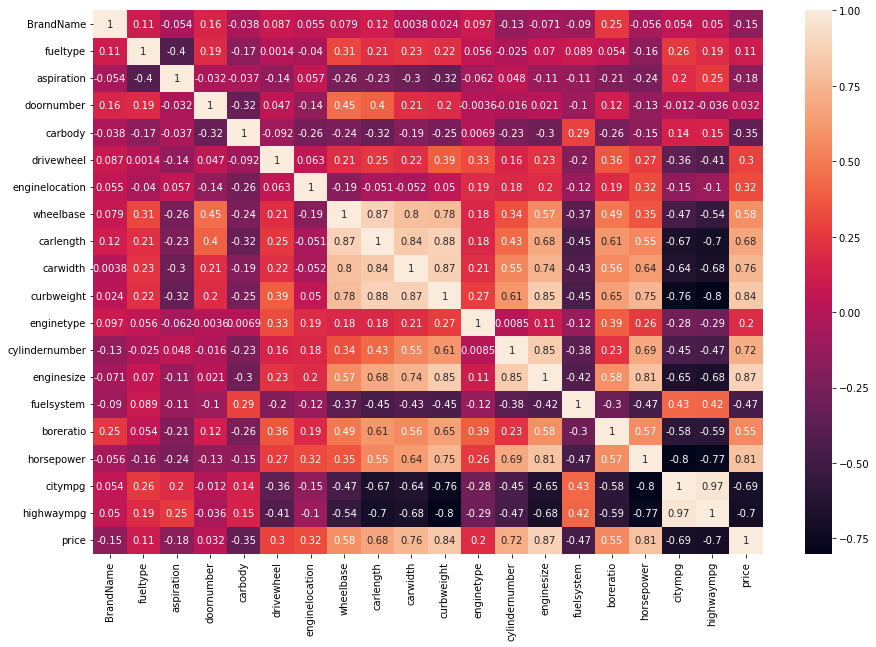

In [21]:
cor = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(cor,annot = True)

In [22]:
del df['BrandName']
del df['fueltype']
del df['aspiration']
del df['doornumber']
del df['enginetype']
del df['fuelsystem']     

<AxesSubplot:>

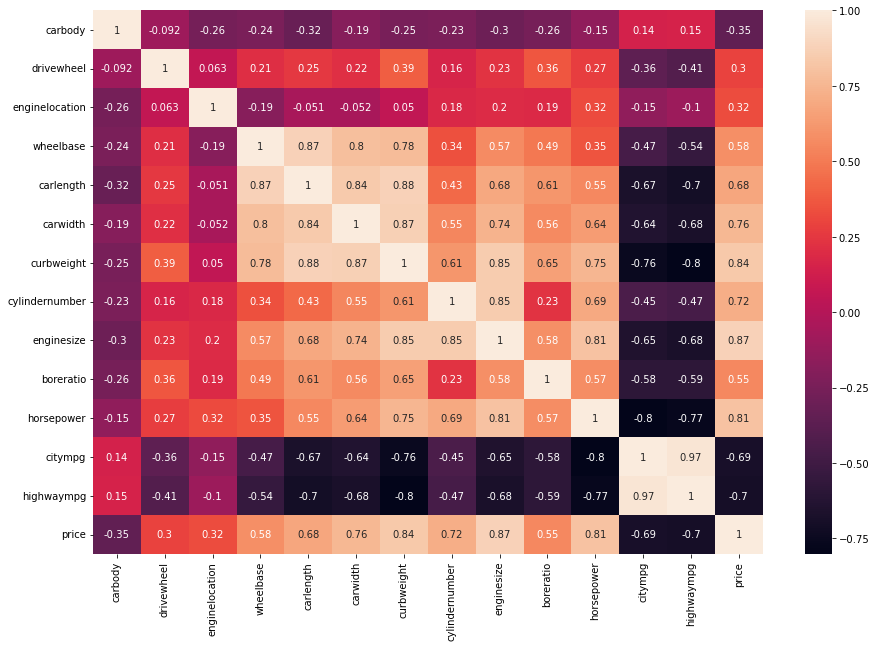

In [23]:
cor = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(cor,annot = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carbody         205 non-null    int64  
 1   drivewheel      205 non-null    int64  
 2   enginelocation  205 non-null    int64  
 3   wheelbase       205 non-null    float64
 4   carlength       205 non-null    float64
 5   carwidth        205 non-null    float64
 6   curbweight      205 non-null    int64  
 7   cylindernumber  205 non-null    int64  
 8   enginesize      205 non-null    int64  
 9   boreratio       205 non-null    float64
 10  horsepower      205 non-null    int64  
 11  citympg         205 non-null    int64  
 12  highwaympg      205 non-null    int64  
 13  price           205 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 22.5 KB


In [25]:
#df['wheelbase']=df['wheelbase'].astype(int)
#df['carlength']=df['carlength'].astype(int)
#df['carwidth']=df['carwidth'].astype(int)
#df['boreratio']=df['boreratio'].astype(int)
df['price']=df['price'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carbody         205 non-null    int64  
 1   drivewheel      205 non-null    int64  
 2   enginelocation  205 non-null    int64  
 3   wheelbase       205 non-null    float64
 4   carlength       205 non-null    float64
 5   carwidth        205 non-null    float64
 6   curbweight      205 non-null    int64  
 7   cylindernumber  205 non-null    int64  
 8   enginesize      205 non-null    int64  
 9   boreratio       205 non-null    float64
 10  horsepower      205 non-null    int64  
 11  citympg         205 non-null    int64  
 12  highwaympg      205 non-null    int64  
 13  price           205 non-null    int32  
dtypes: float64(4), int32(1), int64(9)
memory usage: 21.7 KB


<AxesSubplot:>

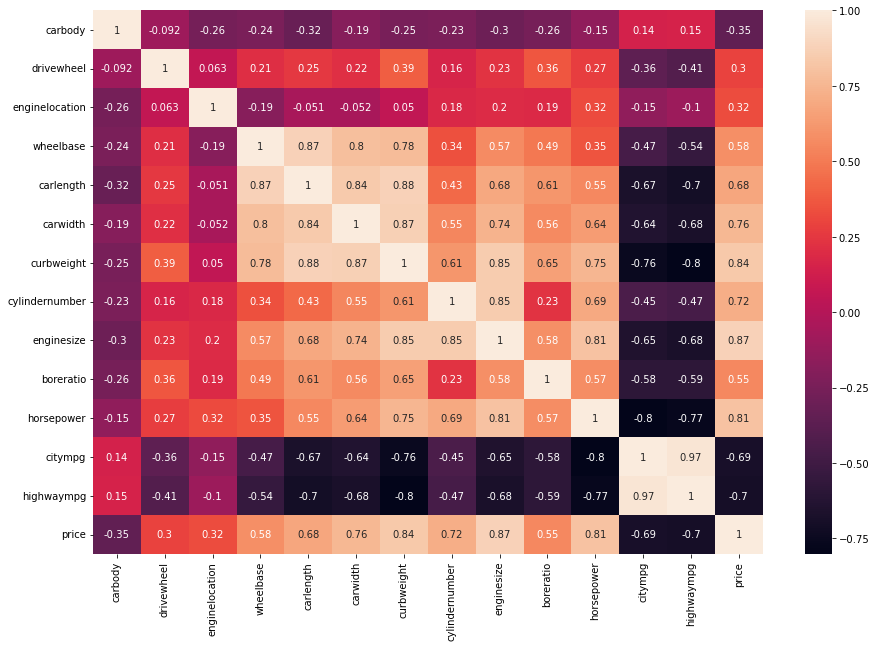

In [27]:
cor = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(cor,annot = True)

In [28]:
df = df.sample(frac = 1.0)
columns = list(df.columns)
columns.remove('price')

y = df['price']
x = df[ columns ]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.7)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_train

array([[-6.99716715e-01,  3.88514345e-01,  0.00000000e+00,
         1.65521136e+00,  1.09663031e+00,  1.32166516e+00,
         1.39330698e+00, -4.06294270e-01,  7.89364203e-01,
         1.40205472e+00, -2.08975853e-01,  4.56824220e-01,
         4.12273347e-01],
       [-6.99716715e-01,  3.88514345e-01,  0.00000000e+00,
         2.56226835e+00,  2.16054154e+00,  1.92331871e+00,
         2.98941414e+00,  1.84679214e+00,  3.78292956e+00,
         1.13715323e+00,  2.19230249e+00, -1.67412641e+00,
        -1.77456788e+00],
       [-6.99716715e-01, -5.98959615e-01,  0.00000000e+00,
         3.21304020e-01,  9.23435464e-01,  3.69047052e-01,
         1.01682961e+00,  1.84679214e+00,  1.60835850e+00,
         3.80291832e-01,  1.48081261e+00, -1.01844929e+00,
        -8.37350213e-01],
       [ 1.19729305e+00, -5.98959615e-01,  0.00000000e+00,
        -5.14611248e-01, -5.85833948e-01, -6.83846653e-01,
        -8.22419173e-01, -4.06294270e-01, -7.35659659e-01,
        -5.27941842e-01, -9.50111144e

In [30]:
number_of_rows = len(df) # 10000
train_count = int(number_of_rows * 0.70)

train = df[:train_count]
test = df[train_count:]

train_y = train['price']
train_x = train[ columns ]

test_y = test['price']
test_x = test[ columns ]


In [31]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

prediction_rfr=rfr.predict(x_test)
print(r2_score(prediction_rfr,y_test))

0.44385829294680723


In [32]:
clf = RandomForestClassifier(max_depth=10, min_samples_leaf=15)
clf.fit( train_x, train_y )

prediction=clf.predict(test_x)
print(r2_score(prediction,test_y))

estimator = clf.estimators_[50]

-3.719384202743546


In [33]:
dtc = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
dtc.fit(x_train,y_train)

prediction=dtc.predict(x_test)
print(r2_score(prediction,y_test))


-21.295063419726734


In [34]:
lr = LinearRegression()
lr.fit(x_train,y_train)

prediction=lr.predict(x_test)
print(r2_score(prediction,y_test))

0.4340701448872939


In [35]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

prediction=abc.predict(x_test)
print(r2_score(prediction,y_test))

-2.7757193537002247


In [36]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

prediction=gnb.predict(x_test)
print(r2_score(prediction,y_test))

0.24768890791473364


In [37]:
estimator = rfr.estimators_[0]

In [38]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = columns,
                class_names = ['gidecek', 'kalacak'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

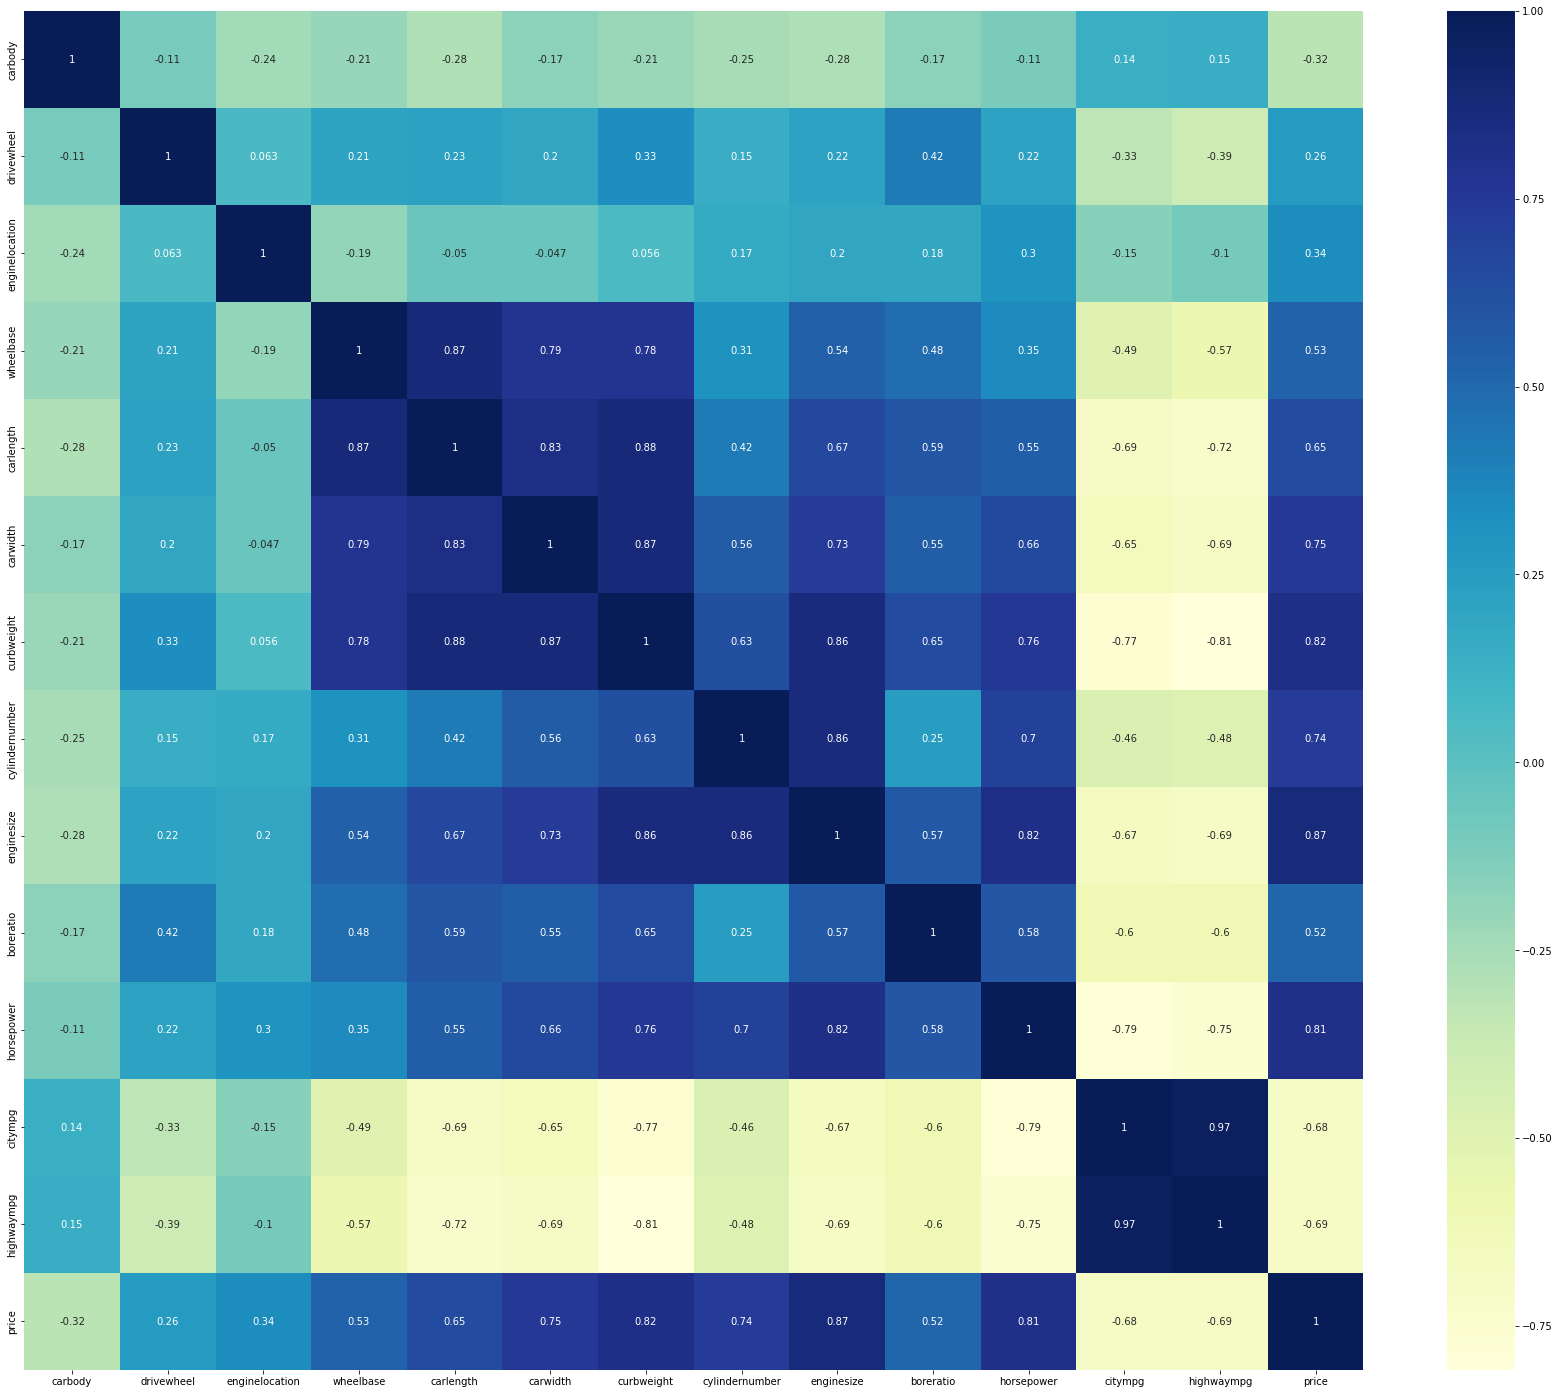

In [39]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [40]:
df.columns

Index(['carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'horsepower', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [41]:
cars_lr = df[['price','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                  'carlength','carwidth']]
cars_lr.head()

,price,carbody,drivewheel,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
50,5195,4,0,93.1,1890,4,91,3.03,68,159.1,64.2
196,15985,2,1,104.3,2935,4,141,3.78,114,188.8,67.2
59,8845,4,0,98.8,2385,4,122,3.39,84,177.8,66.5
203,22470,2,1,109.1,3217,6,145,3.01,106,188.8,68.9
133,12170,2,0,99.1,2695,4,121,3.54,110,186.6,66.5


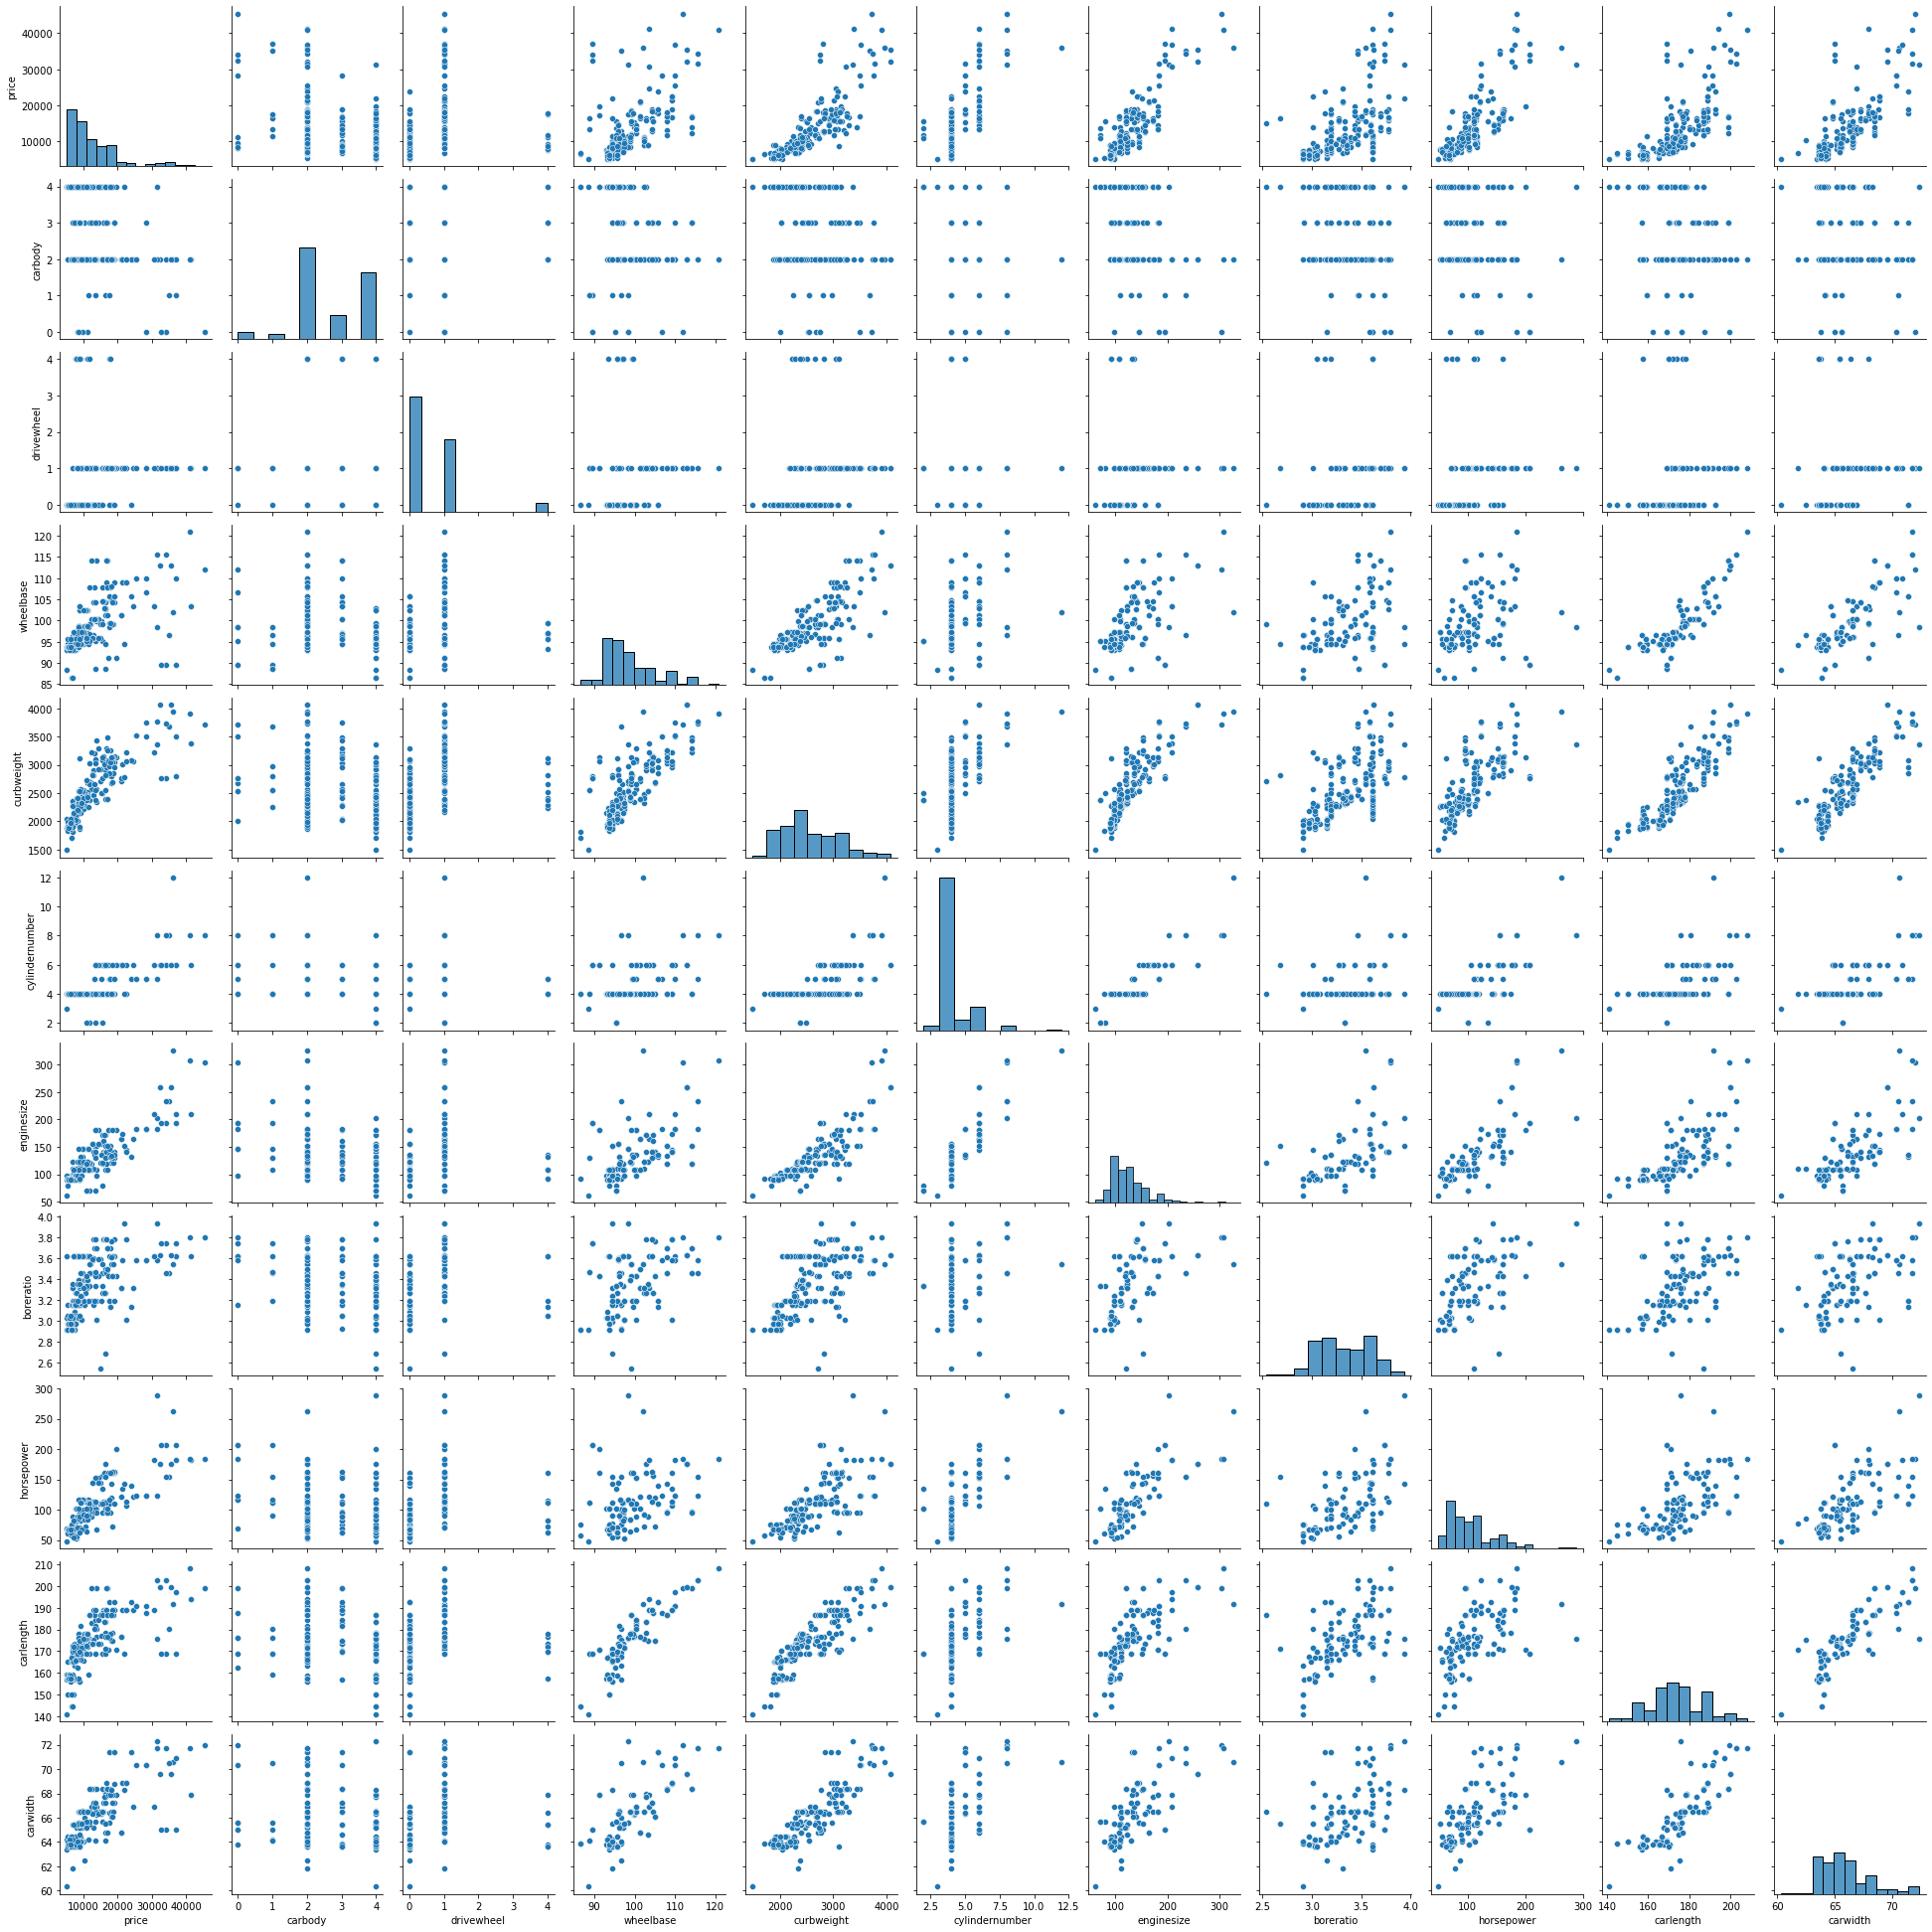

In [42]:
sns.pairplot(cars_lr)
plt.show()